# Decision Trees: Classification

## Understanding Decision Trees

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
data = {
    'Chance of Rainy': [.1, .9, .3, .1,],
    'UV Index': [11, 1, 3, 2,],
    'Umbrella': [True, True, False, False, ],
}

df_umbrella = pd.DataFrame(data)
df_umbrella

,Chance of Rainy,UV Index,Umbrella
0,0.1,11,True
1,0.9,1,True
2,0.3,3,False
3,0.1,2,False


In [3]:
data = df_umbrella.drop(columns=['Umbrella'])
target = df_umbrella.Umbrella

In [4]:
from sklearn.tree import (
    DecisionTreeClassifier,
    plot_tree,
    export_text
)
import warnings
warnings.filterwarnings('ignore')

In [5]:
clf = DecisionTreeClassifier()
clf.fit(data, target)

DecisionTreeClassifier()

# Displaying the Decision Tree

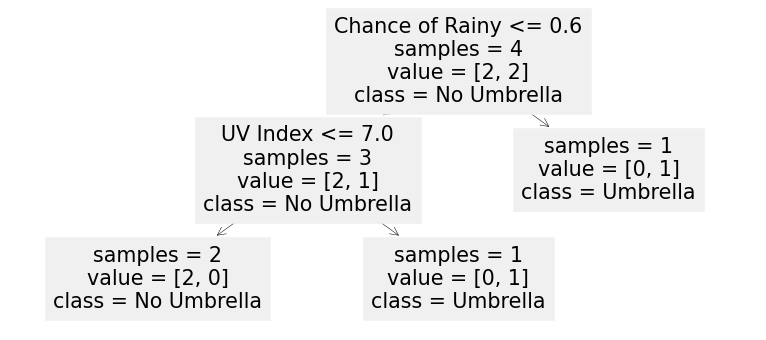

In [6]:
fig, ax = plt.subplots(figsize=(12, 6));

feature_names = ['Chance of Rainy', 'UV Index']

plot_tree(
    clf, 
    filled=False, 
    feature_names=feature_names, 
    class_names=['No Umbrella', 'Umbrella'],
    impurity=False,
    ax=ax,
)

fig.show()

In [7]:
print('Shall I take an umbrella with me?\n')
print(
    export_text(clf, feature_names=feature_names, spacing=3, decimals=1)
)

Shall I take an umbrella with me?

|--- Chance of Rainy <= 0.6
|   |--- UV Index <= 7.0
|   |   |--- class: False
|   |--- UV Index >  7.0
|   |   |--- class: True
|--- Chance of Rainy >  0.6
|   |--- class: True



# Iris Classification using Decision Trees

In [8]:
from sklearn import datasets

iris = datasets.load_iris()

In [9]:
# Let's see what methods the dataset provideds
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [10]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
type(iris.data)

numpy.ndarray

In [13]:
iris.target[:5]

array([0, 0, 0, 0, 0])

In [14]:
df = pd.DataFrame(
    iris.data,
    columns=iris.feature_names
)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
df = df.assign(target = pd.Series(iris.target),)
df = df.assign(
    target_names = df.target.apply(lambda y: iris.target_names[y]),
)

In [16]:
df.sample(n=6)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
17,5.1,3.5,1.4,0.3,0,setosa
82,5.8,2.7,3.9,1.2,1,versicolor
42,4.4,3.2,1.3,0.2,0,setosa
115,6.4,3.2,5.3,2.3,2,virginica
127,6.1,3.0,4.9,1.8,2,virginica
46,5.1,3.8,1.6,0.2,0,setosa


In [17]:
df.shape

(150, 6)

In [18]:
df.target_names.value_counts(normalize=True)

setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: target_names, dtype: float64

This is a balanced dataset

In [19]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_names         0
dtype: int64

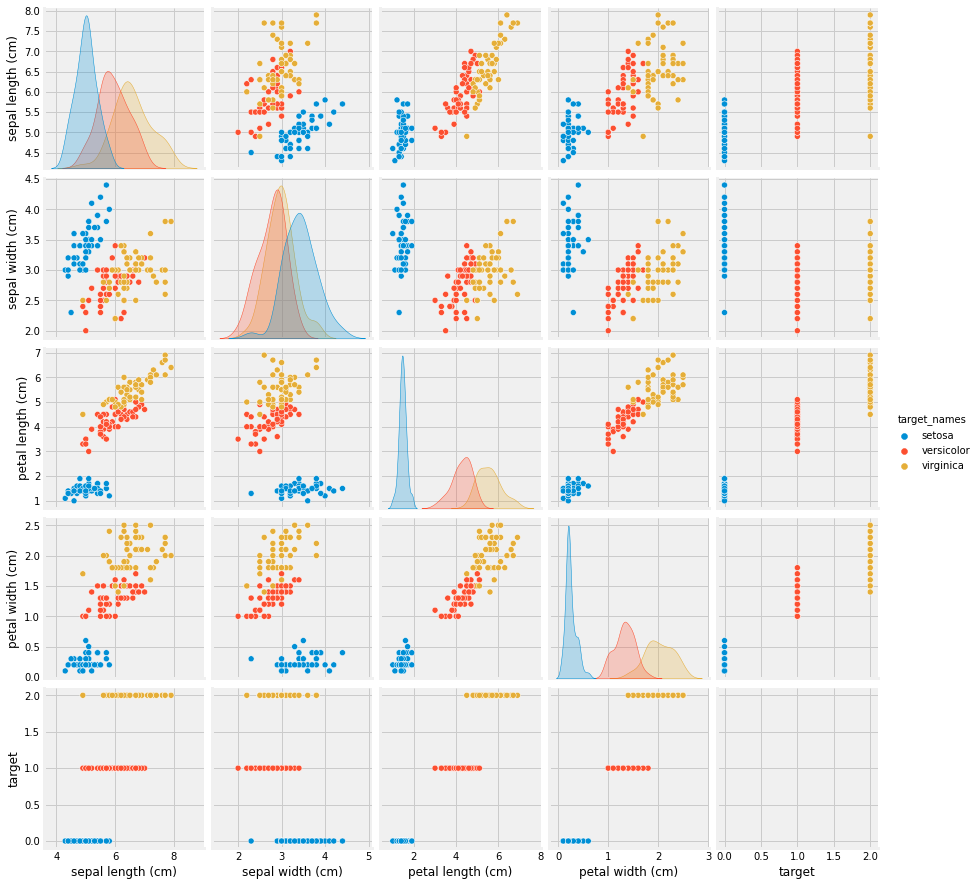

In [20]:
import seaborn as sns

sns.pairplot(df, hue='target_names')

## Split Data

In [21]:
data = df.drop(columns=['target', 'target_names'])
target = df.target

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, target, 
    test_size=.3, random_state=42, stratify=target,
    )

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((105, 4), (105,), (45, 4), (45,))

In [26]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

1    0.333333
0    0.333333
2    0.333333
Name: target, dtype: float64
2    0.333333
1    0.333333
0    0.333333
Name: target, dtype: float64


## Train Classifier

In [27]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
y_pred = clf.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score

score = round(accuracy_score(y_test, y_pred), 3) * 100
score

91.10000000000001

In [30]:
clf.score(X_test, y_test)

0.9111111111111111

## Features Importance

In [32]:
importances = {
    'feature_names': iris.feature_names,
    'feature_importances': clf.feature_importances_,
}

ft_importance = (
    pd.DataFrame(data=importances)
    .sort_values('feature_importances', ascending=False)
    .set_index('feature_names')
)

ft_importance

,feature_importances
feature_names,
petal length (cm),0.553968
petal width (cm),0.431746
sepal length (cm),0.014286
sepal width (cm),0.000000


## Displaying the internal tree decisions 

In [33]:
print('Which species is it?\n')
print(
    export_text(clf, feature_names=iris.feature_names, spacing=3, decimals=1)
)

Which species is it?

|--- petal length (cm) <= 2.4
|   |--- class: 0
|--- petal length (cm) >  2.4
|   |--- petal width (cm) <= 1.6
|   |   |--- petal length (cm) <= 5.0
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  5.0
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.6
|   |   |--- petal length (cm) <= 4.9
|   |   |   |--- sepal length (cm) <= 6.0
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  6.0
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.9
|   |   |   |--- petal width (cm) <= 1.7
|   |   |   |   |--- petal length (cm) <= 5.5
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.5
|   |   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.7
|   |   |   |   |--- class: 2



### What to do to get a more reliable score?
A statistician would say let's run the whole process of data splitting, training, and predicting,
more than once, and get the distribution of the different accuracy scores we get each time.

In [37]:
accuracies = []
for _ in range(500):
  X_train, X_test, y_train, y_test = train_test_split(
    data, target, 
    test_size=.3,
    )
  clf = DecisionTreeClassifier(max_depth=2)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  score = accuracy_score(y_test, y_pred)
  accuracies.append(round(score, 3))

accuracies = pd.Series(accuracies)
accuracies.head()

0    0.978
1    0.844
2    0.933
3    0.978
4    0.911
dtype: float64

In [38]:
accuracies.mean(), accuracies.std()

(0.9387400000000019, 0.0289539126564309)

## plot the accuracy's distribution using a box plot:

Average Score: 0.939 [5th percentile: 0.889 & 95th percentile:0.978]


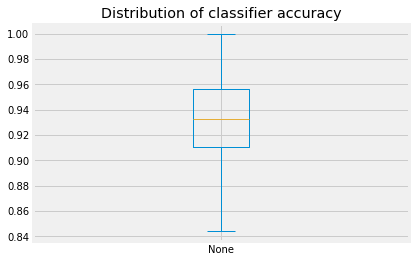

In [39]:
accuracies.plot(kind='box',title='Distribution of classifier accuracy')

print(
    f'Average Score: {accuracies.mean():.3}' 
    f' [5th percentile: {accuracies.quantile(.05):.3} & 95th percentile:'
    f'{accuracies.quantile(.95):.3}]'
)